<img src="https://drive.google.com/uc?export=view&id=1x-QAgitB-S5rxGGDqxsJ299ZQTfYtOhb" width=180, align="center"/>

Master's degree in Intelligent Systems

Subject: 11754 - Deep Learning

Year: 2023-2024

Professor: Miguel Ángel Calafat Torrens

# LABORATORY 2

## Preparation

In [3]:
# This cell connects to your Drive. This is necessary because we are going to
# import files from there
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Replace the string in the following line with the path where you have this
# file. If you have your account in spanish, "MyDrive" is 'Mi unidad'.
%cd '/content/gdrive/MyDrive/Colab Notebooks/deep learning/LAB2'
%ls -l

/content/gdrive/MyDrive/Colab Notebooks/deep learning/LAB2
total 123
-rw------- 1 root root  6125 Mar 11 14:39 helper_PR2.py
-rw------- 1 root root 51596 Mar 23 22:30 LAB-2.ipynb
-rw------- 1 root root 63190 Mar 19 12:56 LSS2-Perceptron.ipynb
drwx------ 2 root root  4096 Mar 11 15:10 __pycache__/


In [5]:
# Here the path of the project folder (which is where this file is) is inserted
# into the python path. There's nothing to do; just execute the cell.
import pathlib
import sys

PROJECT_DIR = str(pathlib.Path().resolve())
sys.path.append(PROJECT_DIR)

In [6]:
# And here we import a few more libraries, among them the one for custom helper
# functions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import helper_PR2 as hp

# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
# from IPython.display import display

## Problem to solve
Imagine you have a cloud of dots. Each dot symbolizes two given characteristics of an individual that are to be used by a bank to determine whether to grant credit. The value of the abscissa could indicate the flow of monthly income, while the value of the ordinate would indicate the amount of money accumulated in a savings account. In this way, the position of the dots in the plane would determine a given pair of features of the economic situation of an individual.

The following graph shows the dots that correspond to the last credit requests. The blue dots are accepted requests, while the red ones correspond to denied requests. It can be seen that in general, the larger the values of abscissa and ordinate, the more likely it is that credit will be granted, although this is not a rigid rule.

<img src="https://drive.google.com/uc?export=view&id=1B2LW8iyDCYVlOzYnCJ26dR0RYh2ZA01a" width="400" align="center">

Next, let's see the code for a random set of dots.

In [7]:
# Seed for random numbers fixed to ensure reproducibility
np.random.seed(42)  # The answer to the great question of “life, the universe
                    # and everything” is 42, but you can choose any value.

In [8]:
# Generation of random dots with slight separation between groups
n = 20

# Coordinates x and y
x1 = (0.4 * np.ones((1, n)) + 0.5 * np.random.random((1, n))).flatten()
y1 = (0.4 * np.ones((1, n)) + 0.5 * np.random.random((1, n))).flatten()

# Labels
labels1 = n * [0]

# Dots vector
p1 = [(xs, ys) for xs, ys in zip(x1, y1)]

# Coordinates x and y
x2 = (0.6 * np.ones((1, n)) + 0.5 * np.random.random((1, n))).flatten()
y2 = (0.6 * np.ones((1, n)) + 0.5 * np.random.random((1, n))).flatten()

# Labels
labels2 = n * [1]

# Second dots vector
p2 = [(xs, ys) for xs, ys in zip(x2, y2)]

# Features and labels
features = p1 + p2
correct_outputs = labels1 + labels2

## How to solve it

With the formulation indicated below solve the proposed problem with a two-layer neural network calculated with numpy. In the hidden layer (first layer) there will be two perceptrons, while in the output layer there will be just one.

<img src="https://drive.google.com/uc?export=view&id=16r4XOQ6IfKj5ezh_SVpztnqYlqIy-L89" width="1200" align="center">

Formulas for the partial derivatives of the losses with respect to $W_1$ y $W_2$

$$ \frac{\partial loss}{\partial W_2}=\frac{\partial loss}{\partial \hat{y}_2}·\frac{\partial \hat{y}_2}{\partial h_2}·\frac{\partial h_2}{\partial W_2}=
\underbrace{\underbrace{-(y-\hat{y}_2)}_{\varepsilon_2} \cdot \sigma(h_2)\,(1-\sigma(h_2))}_{\delta_2} \cdot \hat{Y}_1 $$

$$ \frac{\partial loss}{\partial W_1}=\frac{\partial loss}{\partial \hat{y}_2}·\frac{\partial \hat{y}_2}{\partial h_2}·\frac{\partial h_2}{\partial \hat{y}_1}·\frac{\partial \hat{y}_1}{\partial h_1}·\frac{\partial h_1}{\partial W_1}=
\overbrace{\overbrace{\underbrace{\underbrace{-(y-\hat{y}_2)}_{\varepsilon_2} \cdot \sigma(h_2)\,(1-\sigma(h_2))}_{\delta_2} \cdot W_2}^{\varepsilon_1}\cdot \sigma(H_1)\,(1-\sigma(H_1))}^{\delta_1}\cdot X $$

In [9]:
# In some cells you will find an statement and some lines that mark the space
# in which you have to insert your code. These lines will be indicated as
# Start-End, and between them it could be some helper code; but normally it'll
# be empty or there will be some void command as 'None', or 'pass'.

# For example:

# Assign to the variable "a" the value 4

# Start_________________________________________________________________________
a = 4
# End___________________________________________________________________________

# In this example you should have complete between the lines as follows: a = 4

In [10]:
# Define the sigmoid function

def sigmoid(x):
    # Start_____________________________________________________________________
    return 1 / (1 + np.exp(-x))
    # End_______________________________________________________________________

In [11]:
# Initial values of weights (You don't have todo anything in this cell)
weight1 = 0.1
weight2 = 1.0
bias = -0.6

In [12]:
# Set up matrices and tensors (You don't have todo anything in this cell)

# Batch size
batch_size = 10

# Initial values of the weights W1 (3 x 2) and W2 (3 x 1). In the second column
# the order of the weights has been reversed so that the two neurons do not
# start from the same point.
W1 = np.array([[weight1, weight2, bias], [weight2, bias, weight1]]).T  # 3 x 2
W2 = np.array([[weight1, weight2, bias]]).T  # 3 x 1

# X is a 10 x 2 matrix (dots by coordinates). In the first column are the
# abscissas and in the second are the ordinates; but now it will be delivered
# in batches, so it is convenient to have it sized in 4 batches. Finally it's
# arranged in 4 batches x 10 dots x 2 coordinates.
# 4 x 10 x 2
X = np.array(features).reshape(4, -1, 2)

# Following the same criteria, the correct labels will be arranged in an
# array of 4 x 10 x 1
Y = np.array([correct_outputs]).T.reshape(4, -1, 1)

print('W1:\n{}\n'.format(W1))
print('W2:\n{}'.format(W2))

W1:
[[ 0.1  1. ]
 [ 1.  -0.6]
 [-0.6  0.1]]

W2:
[[ 0.1]
 [ 1. ]
 [-0.6]]


In [34]:
# Training step

# Define your training step function.

# You have to do it step by step, just like the "trainStep" function has been
# done in the theory notebook. Remember that all the states should be accesible
# (i.e. there must be a variable for each matrix X, H, Y, epsilon and delta)

def trainStep_2l(X, Y, W1, W2, lr):
    loss = 0.0
    for Xb, Yb in zip(X, Y):

        # Forward pass
        # Adding bias to input
        Xb_with_bias = np.concatenate((Xb, np.ones((Xb.shape[0], 1))), axis=1)
        # Calculate H1
        H1 = sigmoid(np.dot(Xb_with_bias, W1))
        # Adding bias to H1
        H1_with_bias = np.concatenate((H1, np.ones((H1.shape[0], 1))), axis=1)
        # Calculate H2
        H2 = sigmoid(np.dot(H1_with_bias, W2))
        # Error calculation
        epsilon2 = -(Yb - H2)
        loss += 0.5 * (epsilon2 ** 2).sum()

        # Backpropagation
        # Calculate delta2
        delta2 = epsilon2 * H2 * (1 - H2)
        # Calculate delta1
        delta1 = np.dot(delta2, W2[:-1].T) * H1 * (1 - H1)
        # Calculate increments for W1 and W2
        incW_l1 = np.dot(Xb_with_bias.T, delta1)
        incW_l2 = np.dot(H1_with_bias.T, delta2)

        # Update the weights matrices W1 and W2
        W1 -= lr * incW_l1
        W2 -= lr * incW_l2

    return W1, W2, loss





In [35]:
# Define your training loop (You don't have to do anything here, just execute
# the cell)
# Hyperparameters
lr = 0.1
num_epochs = 1000

# Training
for epoch in range(num_epochs):
    W1, W2, loss = trainStep_2l(X, Y, W1, W2, lr)
print('Epoch: {} Loss: {}'.format(epoch, loss))

Epoch: 999 Loss: 1.6684572227072327


<ipython-input-36-59cf768c7b94>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if round(float(fwd)) == 1:


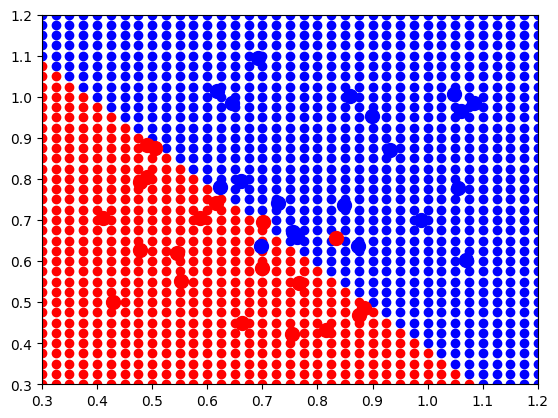

In [36]:
# Check the fit (You don't have to do anything here. Just execute

base = np.linspace(0.2, 1.2, 41)

blue_points_calc = []
red_points_calc = []

for coordX in base:
    for coordY in base:
        p = np.ones((1, 3))
        p[0, 0], p[0, 1] = coordX, coordY
        fwd = sigmoid(np.dot(np.concatenate((sigmoid(np.dot(p, W1)),
                                             np.ones((1, 1))), axis=1), W2))
        if round(float(fwd)) == 1:
            blue_points_calc.append((coordX, coordY))
        else:
            red_points_calc.append((coordX, coordY))

# Plot
hp.plot_dots(blue_points_calc, red_points_calc, p2, p1)